# Sarkazmo aptikimas naujienų antraštėse

#### https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import re
from sklearn import metrics

## Duomenų pasiruošimas

In [184]:
df_con = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
df_test = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

bad_words_lst = ['fucking', 'fuck', 'shit', 'asshole', 'shitty', 'fucks']

In [185]:
df_con

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [186]:
def data_prep(df):
    #svarbių article link dalių perkėlimas į headline (Train data)
    url = df['article_link']
    url = url.str.replace(".","")
    df['headline'] = df['headline'] + ' ' + url.str.split('https://').str[1].str.split('www').str[-1].str.split('net').str[0].str.split('com').str[0]
    df = df.drop(['article_link'], axis=1)

    #keiksmažodžių cenzūravimas ir pritaikymas modeliui (Train data)
    big_regex = re.compile('|'.join(map(re.escape, bad_words_lst)))
    df['headline'] = df['headline'].apply(lambda x: big_regex.sub("swear_word", x) if any(i in x for i in bad_words_lst) else x)
    df['headline'] = df['headline'].str.replace('[0-9]+','')  
    
    return df

In [187]:
df_con = data_prep(df_con)
df_test = data_prep(df_test)

## Duomenų įvertinimas

In [188]:
df_con

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall huffingto...,0
26705,america's best hikes huffingtonpost,0
26706,reparations and obama huffingtonpost,0
26707,israeli ban targeting boycott supporters raise...,0


In [189]:
df_con['headline'][72]

'sick swear_words line up to gape at dead body theonion'

<Figure size 1080x720 with 0 Axes>

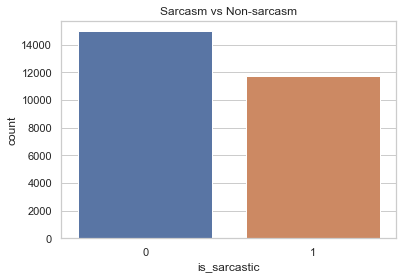

<Figure size 1080x720 with 0 Axes>

In [190]:
sn.set(style="whitegrid")
sn.countplot(df_con.is_sarcastic)
plt.title('Sarcasm vs Non-sarcasm')
plt.figure(figsize=(15,10))

In [191]:
df_con.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [192]:
#prognozavimo rezultatai be modelio.
1 - df_con.is_sarcastic.mean()

0.5610468381444457

## Duomenų paskirstymas į train ir test grupes

In [193]:
X_train = df_con['headline']
y_train = df_con['is_sarcastic']

X_test = df_test['headline']
y_test = df_test['is_sarcastic']

## Duomenų keitimas į skaitines reikšmes naudojant TfidfVectorizer()

In [194]:
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=0.8, min_df=10)
X_train_sm = vect.fit_transform(X_train)
X_test_sm = vect.transform(X_test)

In [195]:
X_train_sm

<26709x4216 sparse matrix of type '<class 'numpy.float64'>'
	with 167576 stored elements in Compressed Sparse Row format>

In [196]:
pd.DataFrame(X_train_sm.toarray(), columns=vect.get_feature_names())

,abandoned,abc,ability,able,abortion,abroad,absence,absolutely,abuse,abused,...,york times,young,younger,youth,youtube,zero,zika,zone,zoo,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26704,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26705,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26706,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26707,0.0,0.0,0.0,0.0,0.0,0.445779,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
word_list = vect.get_feature_names();    
count_list = X_train_sm.toarray().sum(axis=0) 

vocab =  dict(zip(word_list,count_list))
vocab = pd.DataFrame.from_dict(vocab, orient='index',  columns=['Count'])
vocab = vocab.sort_values(by='Count', ascending=False)

In [198]:
vocab.head(15)

,Count
huffingtonpost,1654.900425
theonion,1025.857565
localtheonion,629.518782
politicstheonion,386.027738
trump,366.684698
new,352.773761
man,347.724744
entertainmenttheonion,327.823232
just,166.389611
area,160.474908


## Modelio kūrimas naudojant Logistic Regression


In [199]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(C=10)

In [200]:
model_lr.fit(X_train_sm, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
y_pred_class_lr = model_lr.predict(X_test_sm)
metrics.accuracy_score(y_test, y_pred_class_lr)

0.9991963380970684

In [202]:
X_train_tokens_lr = vect.get_feature_names()
abs_weights = np.abs(model_lr.coef_)[0, :]

In [203]:
tokens_lr = pd.DataFrame({'token':X_train_tokens_lr, 'Feature_Importance':abs_weights}).set_index('token')
tokens_lr = tokens_lr.sort_values(by=['Feature_Importance'], ascending = False)

In [204]:
tokens_lr

,Feature_Importance
token,
huffingtonpost,46.276994
theonion,40.423871
localtheonion,29.036843
politicstheonion,28.882320
entertainmenttheonion,23.202955
...,...
nasty,0.000609
airlines,0.000436
jennifer lawrence,0.000277


<Figure size 1080x720 with 0 Axes>

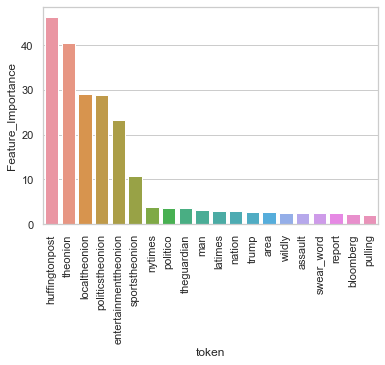

<Figure size 1080x720 with 0 Axes>

In [205]:
sn.barplot(x= tokens_lr.index[:20], y=tokens_lr.Feature_Importance[:20], data=tokens_lr)
plt.xticks(rotation=90)
plt.figure(figsize=(15,10))

## Modelio kūrimas naudojant Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [207]:
model_rf = RandomForestClassifier()
i_range = list(range(2, 21))
param_grid_rf = dict(max_depth = i_range, min_samples_split = i_range)
grid_rf = GridSearchCV(model_rf, param_grid_rf, cv=10, scoring='accuracy', return_train_score=False, n_jobs = -1)
grid_rf.fit(X_train_sm, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [208]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

0.9990640069437726
{'max_depth': 16, 'min_samples_split': 3}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [209]:
model_rf = RandomForestClassifier(max_depth = 20, min_samples_split = 6)

In [210]:
model_rf.fit(X_train_sm, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [211]:
y_pred_class_rf = model_rf.predict(X_test_sm)
metrics.accuracy_score(y_test, y_pred_class_rf)

0.9911946608896188

In [212]:
X_train_tokens_rf = vect.get_feature_names()
model_rf.feature_importances_

array([1.07477716e-06, 2.53136146e-05, 1.79875099e-05, ...,
       0.00000000e+00, 3.10607293e-09, 2.01709350e-05])

In [213]:
tokens_rf = pd.DataFrame({'token':X_train_tokens_rf, 'Feature_Importance':model_rf.feature_importances_}).set_index('token')
tokens_rf = tokens_rf.sort_values(by=['Feature_Importance'], ascending = False)

tokens_rf.head(20)

,Feature_Importance
token,
huffingtonpost,0.348867
theonion,0.113299
localtheonion,0.080035
politicstheonion,0.063987
entertainmenttheonion,0.061114
trump,0.024553
area,0.023232
nation,0.015616
man,0.014690


<Figure size 1080x720 with 0 Axes>

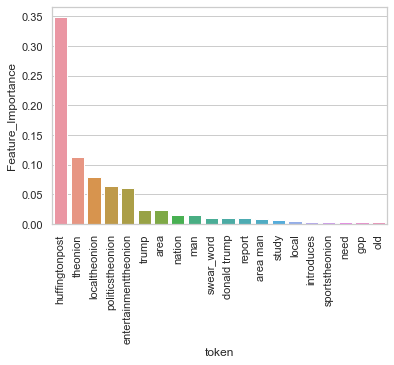

<Figure size 1080x720 with 0 Axes>

In [214]:
sn.barplot(x= tokens_rf.index[:20], y=tokens_rf.Feature_Importance[:20], data=tokens_rf)
plt.xticks(rotation=90)
plt.figure(figsize=(15,10))

## Modelio kūrimas naudojant Naive Bayes: MultinomialNB()

In [215]:
from sklearn.naive_bayes import MultinomialNB

In [216]:
model = MultinomialNB(alpha=0.01)

In [217]:
model.fit(X_train_sm, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [218]:
y_pred_class = model.predict(X_test_sm)

In [219]:
metrics.accuracy_score(y_test, y_pred_class)

0.9867570495125616

## Rezultatų analizė remiantis MultinomialNB() modelio rezultatais

### Confusion matrix

In [220]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[14844,   141],
       [  238, 13396]], dtype=int64)

### False Positives / False Negatives

In [221]:
# false positives (standartinės antraštės neteisingai identifikuojamos kaip sarkastiškos)
X_test[y_test < y_pred_class]

101      study finds american diets are poor (but impro...
102      after decades of effort, chemists overseas rep...
205      to the obese woman crying at the picnic table ...
308      death of mentally ill woman in police custody ...
377      fda approves nasal-spray version of overdose d...
                               ...                        
27024    alec confidential: inside the secretive group'...
27175    gladys knight sues to remove name from chicken...
27531    after learning about homelessness, kind toddle...
27551    detroit-area residents demand clean air huffin...
27926    bassnectar debuts two new hard-hitting tracks,...
Name: headline, Length: 141, dtype: object

In [222]:
X_test[101]

'study finds american diets are poor (but improving!) huffingtonpost'

In [223]:
# false negatives (sarkastiškos antraštės neteisingai identifikuojamos kaip standartinės)
X_test[y_test > y_pred_class]

347      global-warming crisis makes for delightful mid...
486      jimmy fallon six tantalizing months from disap...
581      inconsolable sarah palin opens up about sacha ...
638      new instant lottery game features three ways t...
716      putin condemns ukrainian people's unprovoked ,...
                               ...                        
27910    cop who shot unarmed black man let off with a ...
27930    hollywood diet secrets fall into non-celebrity...
28234    no-makeup look easier to achieve than elle cla...
28367    father-in-law think tank issues comprehensive ...
28434    taliban agrees to peace deal despite concerns ...
Name: headline, Length: 238, dtype: object

In [224]:
X_test[347]

'global-warming crisis makes for delightful mid-february afternoon theonion'

### Sarcasm ratio in different words

In [225]:
X_train_tokens = vect.get_feature_names()

In [226]:
print(X_train_tokens[0:50])

['abandoned', 'abc', 'ability', 'able', 'abortion', 'abroad', 'absence', 'absolutely', 'abuse', 'abused', 'abusive', 'academy', 'accept', 'acceptance', 'accepting', 'accepts', 'access', 'accident', 'accidentally', 'according', 'account', 'accusations', 'accused', 'accuses', 'acquires', 'act', 'acting', 'acting like', 'action', 'activist', 'activists', 'actor', 'actors', 'actress', 'actual', 'actually', 'ad', 'ad huffingtonpost', 'adam', 'add', 'added', 'addiction', 'address', 'adds', 'adele', 'administration', 'admit', 'admits', 'adorable', 'ads']


In [227]:
model.feature_count_

array([[4.83092847, 3.9066042 , 1.924182  , ..., 3.88694424, 2.45450549,
        3.75873655],
       [2.32852624, 1.92555452, 4.26382144, ..., 4.57648396, 9.06628516,
        4.35841063]])

In [228]:
non_sarcastic_token_count = model.feature_count_[0, :]
sarcastric_token_count = model.feature_count_[1, :]

In [229]:
tokens = pd.DataFrame({'token':X_train_tokens, 'Not-Sarcastic':non_sarcastic_token_count, 'Sarcastic':sarcastric_token_count}).set_index('token')
tokens.head(10)

,Not-Sarcastic,Sarcastic
token,,
abandoned,4.830928,2.328526
abc,3.906604,1.925555
ability,1.924182,4.263821
able,2.765260,7.170922
abortion,18.525555,5.758625
abroad,5.255115,0.865525
absence,2.937641,2.685370
absolutely,6.227233,7.088822
abuse,15.482278,2.159456


In [230]:
tokens['Not-Sarcastic'] = tokens['Not-Sarcastic'] + 1
tokens['Sarcastic'] = tokens['Sarcastic'] + 1

In [231]:
tokens['Not-Sarcastic'] = tokens['Not-Sarcastic'] / model.class_count_[0]
tokens['Sarcastic'] = tokens['Sarcastic'] / model.class_count_[1]
tokens.sample(10)

,Not-Sarcastic,Sarcastic
token,,
continue,0.000468,0.000649
trapped,0.000356,0.000438
shell,0.000264,0.000311
subway,0.000409,0.000835
decide,0.000397,0.000418
man accused,0.000376,0.000085
exercise,0.000407,0.000389
debates,0.000298,0.000336
lady,0.000727,0.000596


In [232]:
tokens['sarcasm_ratio'] = tokens['Sarcastic'] / tokens['Not-Sarcastic']
tokens.sample(10)

,Not-Sarcastic,Sarcastic,sarcasm_ratio
token,,,
dunham,0.000476,0.000147,0.308794
lawyer,0.000678,0.000358,0.528553
subway,0.000409,0.000835,2.042891
records,0.000421,0.000271,0.642574
conservatives,0.000724,0.000085,0.117741
considering,0.000271,0.000444,1.640806
partner,0.000364,0.000502,1.380315
park,0.000393,0.001297,3.297516
new evidence,0.000094,0.000440,4.669362


In [233]:
sarcasm_ratio_df = tokens.sort_values('sarcasm_ratio', ascending=False)
not_sarcasm_ratio_df = (tokens[['sarcasm_ratio']]) * -1

In [234]:
sarcasm_ratio_df

,Not-Sarcastic,Sarcastic,sarcasm_ratio
token,,,
theonion,0.000077,0.087573,1139.817697
localtheonion,0.000067,0.053780,805.895936
politicstheonion,0.000067,0.033012,494.678493
entertainmenttheonion,0.000067,0.028047,420.284555
area man,0.000067,0.007965,119.360590
...,...,...,...
video huffingtonpost,0.002026,0.000085,0.042091
donald trump,0.008585,0.000352,0.041053
day huffingtonpost,0.002305,0.000085,0.037005


In [235]:
sarcasm_ratio_dict = dict(zip(sarcasm_ratio_df.index.tolist(), sarcasm_ratio_df['sarcasm_ratio'].tolist()))
not_sarcasm_ratio_dict = dict(zip(not_sarcasm_ratio_df.index.tolist(), not_sarcasm_ratio_df['sarcasm_ratio'].tolist()))

In [236]:
from wordcloud import WordCloud
wc = WordCloud(width=3000, height=1500, max_words=50).generate_from_frequencies(sarcasm_ratio_dict)

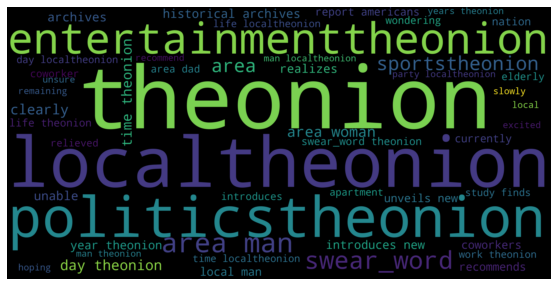

In [237]:
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [238]:
wc_not = WordCloud(width=3000, height=1500, max_words=50).generate_from_frequencies(not_sarcasm_ratio_dict)

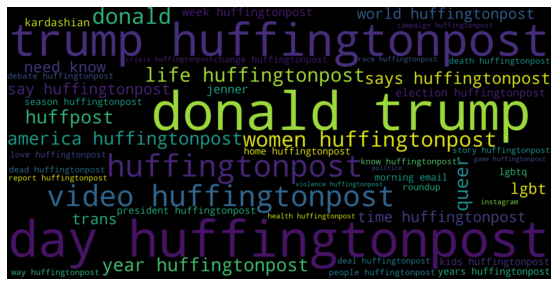

In [239]:
plt.figure(figsize=(10,5))
plt.imshow(wc_not, interpolation='bilinear')
plt.axis("off")
plt.show()


## Pasirinktinų antraščių tikrinimas

In [250]:
headline_test = ["Construction Worker Performs Incredibly Intricate Tricks With His Giant Excavating Machine"]
headline_test_t = vect.transform(headline_test)

In [263]:
print (headline_test_t)

  (0, 4165)	0.4757453163164351
  (0, 2215)	0.4898925335550495
  (0, 1491)	0.4842111563934077
  (0, 769)	0.5470020617823563


In [267]:
print(X_train_tokens[4165])
print(X_train_tokens[2215])
print(X_train_tokens[1491])
print(X_train_tokens[769])

worker
machine
giant
construction


In [252]:
if model_lr.predict(headline_test_t) == 1:
    print('Headline is sarcastic')
else:
    print('Headline is not sarcastic')

Headline is not sarcastic
